In [1]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [50]:
data = pd.read_csv('Data/historical_BTCUSDT_3min_data.csv')

In [3]:
data

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1598918400000,11649.51,11668.50,11649.50,11667.12,165.713325,1598918579999,1.932464e+06,2146,83.409576,9.725705e+05,0
1,1598918580000,11667.12,11667.72,11634.06,11645.19,248.783097,1598918759999,2.897763e+06,3230,92.608664,1.078562e+06,0
2,1598918760000,11645.51,11649.88,11629.00,11639.12,217.735241,1598918939999,2.534315e+06,5186,93.190672,1.084609e+06,0
3,1598918940000,11639.12,11642.21,11630.21,11639.01,169.768550,1598919119999,1.975641e+06,3282,56.131767,6.532171e+05,0
4,1598919120000,11639.00,11640.01,11627.22,11634.16,130.973394,1598919299999,1.523519e+06,2300,45.500733,5.292799e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
590396,1705276080000,41974.12,41987.22,41960.00,41980.24,66.959870,1705276259999,2.810908e+06,1570,20.292170,8.517988e+05,0
590397,1705276260000,41980.25,41980.25,41761.10,41761.11,162.073370,1705276439999,6.788964e+06,3466,72.522970,3.038316e+06,0
590398,1705276440000,41761.10,41864.42,41720.00,41837.73,424.454090,1705276619999,1.773590e+07,5239,199.002240,8.315683e+06,0
590399,1705276620000,41837.73,41850.00,41732.35,41732.35,135.986200,1705276799999,5.685374e+06,2422,59.460990,2.485873e+06,0


In [4]:
def find_threshold_crossing(df, start_index, percent):
    # Ensure the start_index is valid
    if start_index >= len(df):
        return None, None

    # Getting the open price at the start index
    open_price = df.loc[start_index, 'Open']

    # Calculating the thresholds
    threshold_up = open_price * (1 + percent/100)
    threshold_down = open_price * (1 - percent/100)

    # Variables to store the number of candles it took to cross each threshold
    up_cross = None
    down_cross = None

    # Calculate the maximum number of candles for 7 days
    max_candles = 7 * 24 * 20

    # Iterate through the dataframe starting from the start index
    for index, row in df.loc[start_index:].iterrows():
        if index - start_index > max_candles:
            # Stop if 7 days have passed without crossing either threshold
            break

        if up_cross is None and row['High'] >= threshold_up:
            up_cross = index - start_index

        if down_cross is None and row['Low'] <= threshold_down:
            down_cross = index - start_index

    return up_cross, down_cross

In [5]:
df = data
start_index = 0
result = find_threshold_crossing(df=df, start_index=0, percent=1)
print(result)

(118, 7)


In [6]:
# output = []

# for i in range(len(df)):
#     up_cross, down_cross = find_threshold_crossing(df=df, start_index=0, percent=1)
#     output.append([up_cross, down_cross])

#     if i%1 == 0:
#         print(f'{i}/{len(df)} processing...')


In [51]:
threshold_data = pd.read_csv('Data/up_down_cross_3min_data.csv')

In [45]:
threshold_data

,up_cross,down_cross
0,118.0,7.0
1,117.0,6.0
2,116.0,5.0
3,115.0,4.0
4,114.0,3.0
...,...,...
590396,NaN,NaN
590397,NaN,NaN
590398,NaN,NaN
590399,NaN,NaN


In [8]:
print(len(threshold_data))

590401


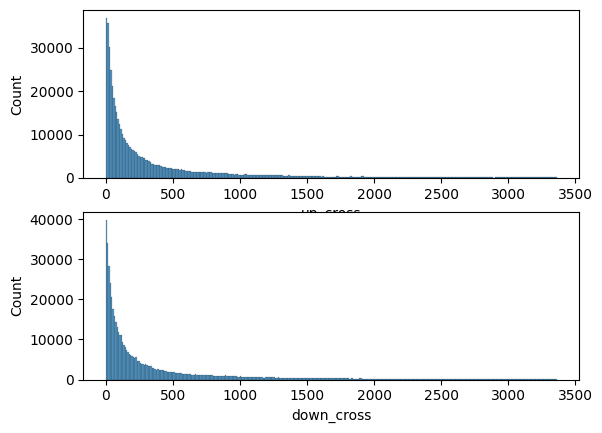

In [9]:
plt.subplot(2,1,1)
sns.histplot(threshold_data['up_cross'])

plt.subplot(2,1,2)
sns.histplot(threshold_data['down_cross'])

plt.show()

In [65]:
threshold_data.isna().sum()/len(threshold_data)*100

up_cross      10.838735
down_cross    12.885649
dtype: float64

In [66]:
temp = threshold_data.fillna(3360)

In [67]:
# Create the 'minutes' column
temp['minutes'] = temp[['up_cross', 'down_cross']].min(axis=1)*3

# Create the 'side' column
temp['side'] = temp.apply(lambda row: 1 if row['up_cross'] < row['down_cross'] else (-1 if row['up_cross'] > row['down_cross'] else 0), axis=1)

# Creating a new DataFrame with just the 'minutes' and 'side' columns
one_percent_data = temp[['minutes', 'side']]


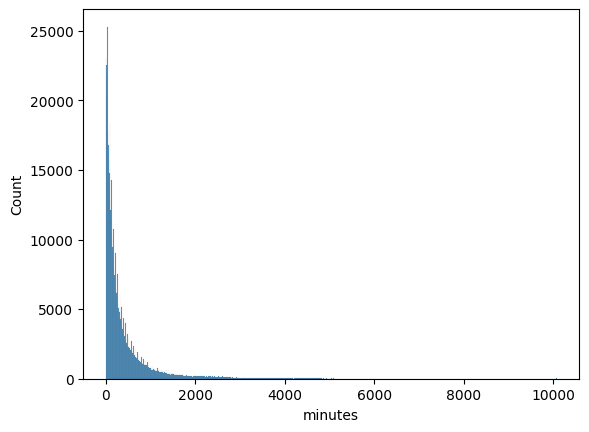

In [13]:
sns.histplot(one_percent_data['minutes'])
plt.show()

In [14]:
one_percent_data['minutes'].describe()

count    590401.000000
mean        421.202508
std         669.064896
min           0.000000
25%          66.000000
50%         183.000000
75%         471.000000
max       10080.000000
Name: minutes, dtype: float64

In [15]:
mean = one_percent_data['minutes'].mean()
median = one_percent_data['minutes'].median()
std_dev = one_percent_data['minutes'].std()
quartiles = one_percent_data['minutes'].quantile([0.25, 0.5, 0.75])

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"1st Quartile: {quartiles[0.25]}")
print(f"2nd Quartile (Median): {quartiles[0.5]}")
print(f"3rd Quartile: {quartiles[0.75]}")

Mean: 421.2025081258331
Median: 183.0
Standard Deviation: 669.0648959617771
1st Quartile: 66.0
2nd Quartile (Median): 183.0
3rd Quartile: 471.0


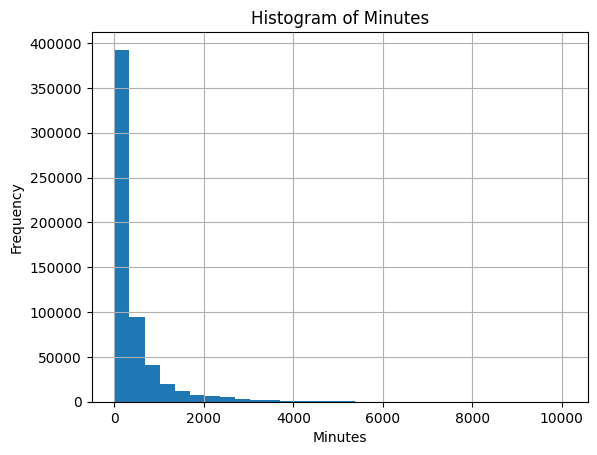

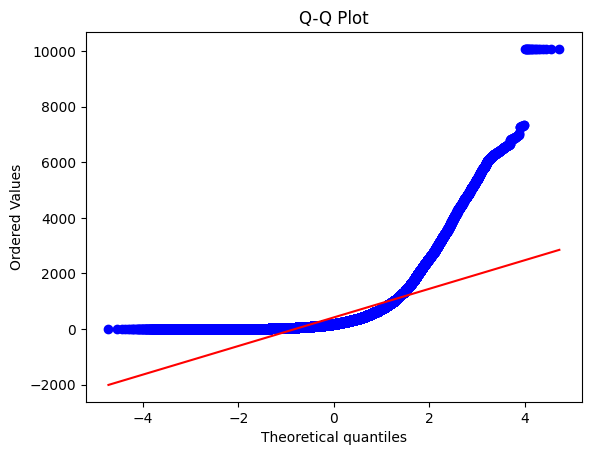

In [16]:
# Histogram
one_percent_data['minutes'].hist(bins=30)
plt.title('Histogram of Minutes')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
stats.probplot(one_percent_data['minutes'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

/var/folders/mj/m28wyfp54xbfc1pkqh5_b64r0000gn/T/ipykernel_678/1886537575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_percent_data['log_minutes'] = np.log(one_percent_data['minutes'] + 1)  # Adding 1 to avoid log(0)


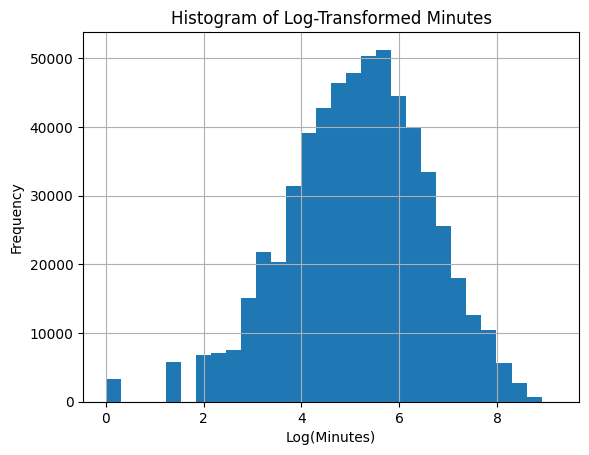

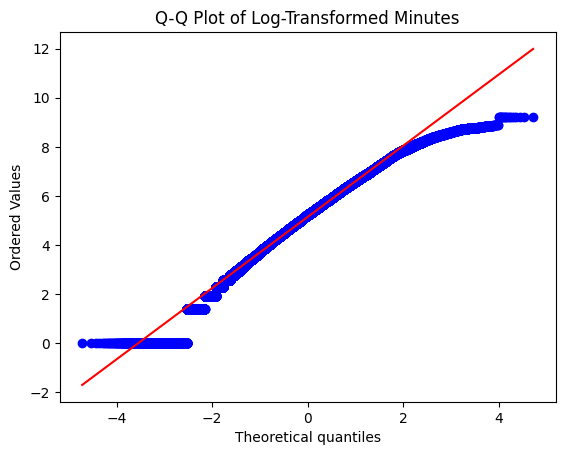

In [68]:
# Log Transformation
one_percent_data['log_minutes'] = np.log(one_percent_data['minutes'] + 1)  # Adding 1 to avoid log(0)

# Now, plot the histogram and Q-Q plot for the transformed data
one_percent_data['log_minutes'].hist(bins=30)
plt.title('Histogram of Log-Transformed Minutes')
plt.xlabel('Log(Minutes)')
plt.ylabel('Frequency')
plt.show()

stats.probplot(one_percent_data['log_minutes'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Minutes')
plt.show()

In [25]:
# remove the outliers
total_length = len(one_percent_data)
side_zeros = len(one_percent_data[one_percent_data['side']==0])
print(f'side = 0 values : {side_zeros/total_length*100}%\n')
more_than_a_day = one_percent_data[one_percent_data['minutes']>24*60]
print(f'took more than a day values : {len(more_than_a_day)/total_length*100}%')
more_than_12hours = one_percent_data[one_percent_data['minutes']>12*60]
print(f'took more than 12 hours values : {len(more_than_12hours)/total_length*100}%')
more_than_8hours = one_percent_data[one_percent_data['minutes']>8*60]
print(f'took more than 8 hours values : {len(more_than_8hours)/total_length*100}%')
more_than_6hours = one_percent_data[one_percent_data['minutes']>6*60]
print(f'took more than 6 hours values : {len(more_than_6hours)/total_length*100}%\n')

less_than_15minutes = one_percent_data[one_percent_data['minutes']<15]
print(f'took less than 15 minutes values : {len(less_than_15minutes)/total_length*100}%')
less_than_30minutes = one_percent_data[one_percent_data['minutes']<30]
print(f'took less than 30 minutes values : {len(less_than_30minutes)/total_length*100}%')
less_than_1hours = one_percent_data[one_percent_data['minutes']<60]
print(f'took less than 1 hour values : {len(less_than_1hours)/total_length*100}%')

side = 0 values : 0.14210680537465215%

took more than a day values : 6.344670825422044%
took more than 12 hours values : 15.98235775345909%
took more than 8 hours values : 24.542641357314775%
took more than 6 hours values : 31.47843584275772%

took less than 15 minutes values : 5.1629316346008896%
took less than 30 minutes values : 11.413090424982343%
took less than 1 hour values : 22.15883780684653%


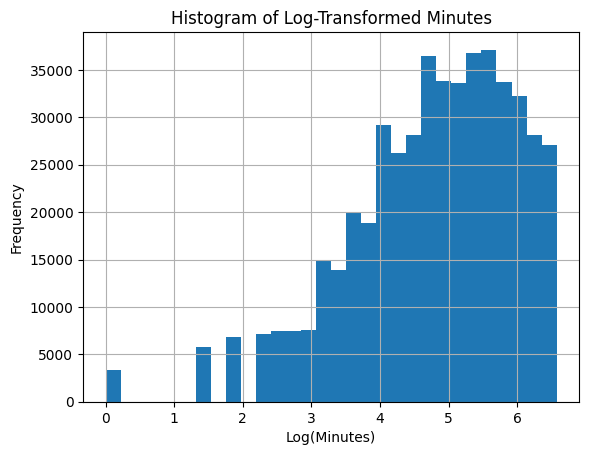

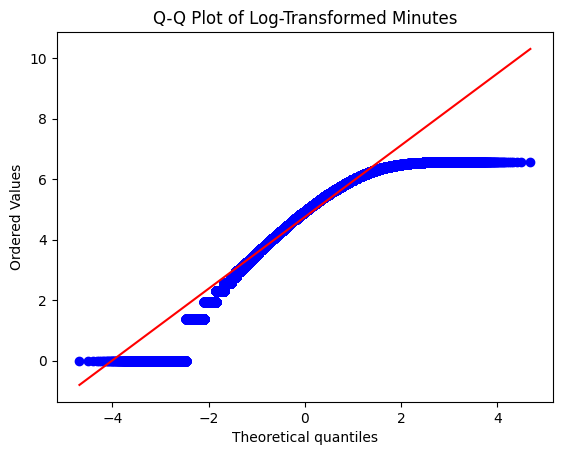

In [26]:
less_than_a_12hour = one_percent_data[one_percent_data['minutes']<12*60]

# Now, plot the histogram and Q-Q plot for the transformed data
less_than_a_12hour['log_minutes'].hist(bins=30)
plt.title('Histogram of Log-Transformed Minutes')
plt.xlabel('Log(Minutes)')
plt.ylabel('Frequency')
plt.show()

stats.probplot(less_than_a_12hour['log_minutes'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Minutes')
plt.show()

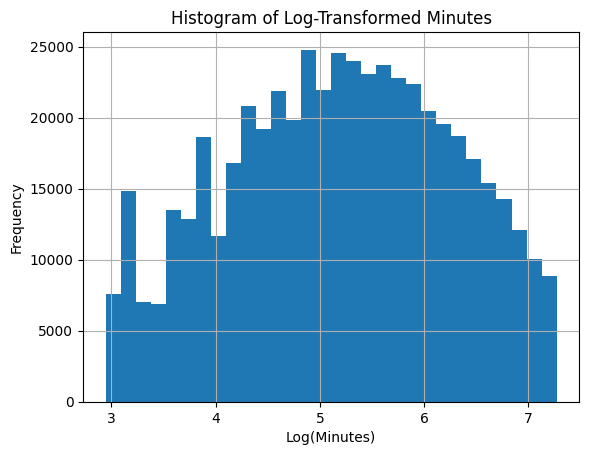

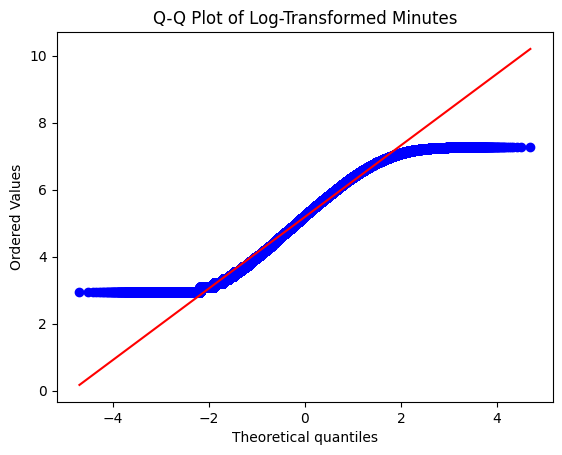

In [27]:
middle_values = one_percent_data[(one_percent_data['minutes']<24*60)&(one_percent_data['minutes']>15)]

# Now, plot the histogram and Q-Q plot for the transformed data
middle_values['log_minutes'].hist(bins=30)
plt.title('Histogram of Log-Transformed Minutes')
plt.xlabel('Log(Minutes)')
plt.ylabel('Frequency')
plt.show()

stats.probplot(middle_values['log_minutes'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Minutes')
plt.show()

In [28]:
np.e**2

7.3890560989306495

In [29]:
np.e**7

1096.6331584284583

In [38]:
less_than_6hours = one_percent_data[one_percent_data['minutes']<6*60]

less_than_6hours

,minutes,side,log_minutes
0,21.0,-1,3.091042
1,18.0,-1,2.944439
2,15.0,-1,2.772589
3,12.0,-1,2.564949
4,9.0,-1,2.302585
...,...,...,...
590378,30.0,-1,3.433987
590379,27.0,-1,3.332205
590380,36.0,-1,3.610918
590381,36.0,-1,3.610918


In [40]:
print(f'up cross : {len(less_than_6hours[less_than_6hours['side']>0])/total_length}')
print(f'down cross : {len(less_than_6hours[less_than_6hours['side']<0])/total_length}')

up cross : 0.33599197833337
down cross : 0.3465746162354061


In [83]:
temp2 = one_percent_data.copy()
temp2['plus_6'] = ((temp2['minutes']<6*60)&(temp2['side']>0)).astype(int)
temp2['minus_6'] = ((temp2['minutes']<6*60)&(temp2['side']<0)).astype(int)
temp2['zero_6'] = ((temp2['minutes']>=6*60)|(temp2['side']==0)).astype(int)
data2 = temp2

In [84]:
df_all = pd.concat([data,threshold_data,data2],axis=1)
df_all

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,up_cross,down_cross,minutes,side,log_minutes,plus_6,minus_6,zero_6
0,1598918400000,11649.51,11668.50,11649.50,11667.12,165.713325,1598918579999,1.932464e+06,2146,83.409576,9.725705e+05,0,118.0,7.0,21.0,-1,3.091042,0,1,0
1,1598918580000,11667.12,11667.72,11634.06,11645.19,248.783097,1598918759999,2.897763e+06,3230,92.608664,1.078562e+06,0,117.0,6.0,18.0,-1,2.944439,0,1,0
2,1598918760000,11645.51,11649.88,11629.00,11639.12,217.735241,1598918939999,2.534315e+06,5186,93.190672,1.084609e+06,0,116.0,5.0,15.0,-1,2.772589,0,1,0
3,1598918940000,11639.12,11642.21,11630.21,11639.01,169.768550,1598919119999,1.975641e+06,3282,56.131767,6.532171e+05,0,115.0,4.0,12.0,-1,2.564949,0,1,0
4,1598919120000,11639.00,11640.01,11627.22,11634.16,130.973394,1598919299999,1.523519e+06,2300,45.500733,5.292799e+05,0,114.0,3.0,9.0,-1,2.302585,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590396,1705276080000,41974.12,41987.22,41960.00,41980.24,66.959870,1705276259999,2.810908e+06,1570,20.292170,8.517988e+05,0,NaN,NaN,10080.0,0,9.218408,0,0,1
590397,1705276260000,41980.25,41980.25,41761.10,41761.11,162.073370,1705276439999,6.788964e+06,3466,72.522970,3.038316e+06,0,NaN,NaN,10080.0,0,9.218408,0,0,1
590398,1705276440000,41761.10,41864.42,41720.00,41837.73,424.454090,1705276619999,1.773590e+07,5239,199.002240,8.315683e+06,0,NaN,NaN,10080.0,0,9.218408,0,0,1
590399,1705276620000,41837.73,41850.00,41732.35,41732.35,135.986200,1705276799999,5.685374e+06,2422,59.460990,2.485873e+06,0,NaN,NaN,10080.0,0,9.218408,0,0,1


In [85]:
# Create a boolean series where True indicates the rows with the sum equal to 1
rows_with_sum_one = (df_all['plus_6'] + df_all['minus_6'] + df_all['zero_6']) == 1

# Check if all values in the boolean series are True
all_rows_sum_to_one = rows_with_sum_one.all()

print(f"All rows have a sum of 1: {all_rows_sum_to_one}")


All rows have a sum of 1: True


In [88]:
df_all.to_csv('Data/df_all.csv', index=False)

In [89]:
temp3 = pd.read_csv('Data/df_all.csv')
temp3

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore,up_cross,down_cross,minutes,side,log_minutes,plus_6,minus_6,zero_6
0,1598918400000,11649.51,11668.50,11649.50,11667.12,165.713325,1598918579999,1.932464e+06,2146,83.409576,9.725705e+05,0,118.0,7.0,21.0,-1,3.091042,0,1,0
1,1598918580000,11667.12,11667.72,11634.06,11645.19,248.783097,1598918759999,2.897763e+06,3230,92.608664,1.078562e+06,0,117.0,6.0,18.0,-1,2.944439,0,1,0
2,1598918760000,11645.51,11649.88,11629.00,11639.12,217.735241,1598918939999,2.534315e+06,5186,93.190672,1.084609e+06,0,116.0,5.0,15.0,-1,2.772589,0,1,0
3,1598918940000,11639.12,11642.21,11630.21,11639.01,169.768550,1598919119999,1.975641e+06,3282,56.131767,6.532171e+05,0,115.0,4.0,12.0,-1,2.564949,0,1,0
4,1598919120000,11639.00,11640.01,11627.22,11634.16,130.973394,1598919299999,1.523519e+06,2300,45.500733,5.292799e+05,0,114.0,3.0,9.0,-1,2.302585,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590396,1705276080000,41974.12,41987.22,41960.00,41980.24,66.959870,1705276259999,2.810908e+06,1570,20.292170,8.517988e+05,0,NaN,NaN,10080.0,0,9.218408,0,0,1
590397,1705276260000,41980.25,41980.25,41761.10,41761.11,162.073370,1705276439999,6.788964e+06,3466,72.522970,3.038316e+06,0,NaN,NaN,10080.0,0,9.218408,0,0,1
590398,1705276440000,41761.10,41864.42,41720.00,41837.73,424.454090,1705276619999,1.773590e+07,5239,199.002240,8.315683e+06,0,NaN,NaN,10080.0,0,9.218408,0,0,1
590399,1705276620000,41837.73,41850.00,41732.35,41732.35,135.986200,1705276799999,5.685374e+06,2422,59.460990,2.485873e+06,0,NaN,NaN,10080.0,0,9.218408,0,0,1
